In [14]:
import pandas as pd

df = pd.read_csv('car_details.csv')

df2 = df.drop(columns=['name', 'seller_type', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'])

df2 = df2[["selling_price", "year", "transmission", 'km_driven', 'fuel']]
df2.head()

,selling_price,year,transmission,km_driven,fuel
0,450000,2014,Manual,145500,Diesel
1,370000,2014,Manual,120000,Diesel
2,158000,2006,Manual,140000,Petrol
3,225000,2010,Manual,127000,Diesel
4,130000,2007,Manual,120000,Petrol


In [2]:
# y_pred = price 

# independent variables:
# numerical_variables: ['year', 'selling_price', 'km_driven']
    
# categorical_variables: ['transmission', 'fuel',]

In [59]:
df2.describe

<bound method NDFrame.describe of       selling_price  year transmission  km_driven    fuel
0            450000  2014       Manual     145500  Diesel
1            370000  2014       Manual     120000  Diesel
2            158000  2006       Manual     140000  Petrol
3            225000  2010       Manual     127000  Diesel
4            130000  2007       Manual     120000  Petrol
...             ...   ...          ...        ...     ...
8123         320000  2013       Manual     110000  Petrol
8124         135000  2007       Manual     119000  Diesel
8125         382000  2009       Manual     120000  Diesel
8126         290000  2013       Manual      25000  Diesel
8127         290000  2013       Manual      25000  Diesel

[8128 rows x 5 columns]>

In [60]:
df2.dtypes

selling_price     int64
year              int64
transmission     object
km_driven         int64
fuel             object
dtype: object

In [ ]:
order sections of df by price

In [ ]:
order by year and see what models are the most popular 

               selling_price      year  km_driven
selling_price       1.000000  0.414092  -0.225534
year                0.414092  1.000000  -0.418006
km_driven          -0.225534 -0.418006   1.000000


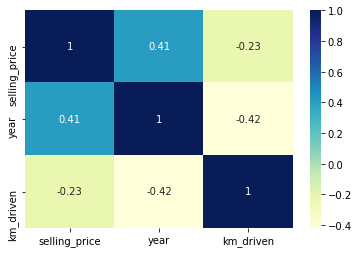

In [15]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with data
data = df2
  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [16]:
X = df2.loc[:, [ "year", 'transmission', 'km_driven', 'fuel']]

y = df2["selling_price"]

In [17]:
# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])

# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical)

# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)



In [18]:
# scaling the features
from sklearn.preprocessing import scale
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns


Index(['year', 'km_driven', 'transmission_Automatic', 'transmission_Manual',
       'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol'],
      dtype='object')

In [35]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [36]:
from sklearn.linear_model import LinearRegression
# instantiate
lm = LinearRegression()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.49643413988336194


In [37]:
from sklearn.ensemble import RandomForestClassifier

# instantiate
lm = RandomForestClassifier()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.7092227518191749


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# instantiate
lm = GradientBoostingRegressor()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.7907768460385691


In [39]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 198944.53256913467
Mean Squared Error: 144628832338.78317


In [40]:
from sklearn.neighbors import KNeighborsRegressor
# instantiate
lm = KNeighborsRegressor()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.7665607775928895


In [41]:
from sklearn.tree import DecisionTreeRegressor

# instantiate
lm = DecisionTreeRegressor()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

0.7293940605659885


In [42]:
from sklearn.linear_model import ElasticNet

# instantiate
lm = ElasticNet()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))



0.4725614042729004


In [43]:
from sklearn.linear_model import Lasso

# instantiate
lm = Lasso()
# fit
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.49599005736070345